<h1 align="center">Hacettepe University<br>Department of Computer Science</h1> 
<h2 align="center">BBM 409 - Machine Learning Laboratory<br>2021 Fall</h2>
<h4 align="center">Assignment 1<br>Due on October 29, 2021</h4>



<table>
    <tr>
      <td><h4>Name Surname</h4></td>
      <td></td>
      <td><h4>Student ID</h4></td>
    </tr>
    <tr>
      <td><h4>Humeyra Uçar</h4></td>
      <td></td>
      <td><h4>21827957</h4></td>
    </tr>
    <tr>
      <td><h4>Murat Çelik</h4></td>
      <td></td>
      <td><h4>21827263</h4></td>
    </tr>
</table>


## Table of Contents
- [1 - Introduction](#1)
- [2 - Background](#2)
    - [2.1 - Feature Normalization ](#2.1)
    - [2.2 - Performance Metrics ](#2.2)
- [3 - Required Libraries](#3)
- [4 - Report Methods](#4)
- [5 - Assignment Solution](#5)
    - [5.1 - Part I: Glass Material Classification ](#5.1)
        - [5.1.1 - Knowledge about Data](#5.1.1)
        - [5.1.2 - Data preprocessing and separation](#5.1.2)
        - [5.1.3 - Unweighted/Uniform KNN Classification](#5.1.3)
            - [5.1.3.1 - Normal Data](#5.1.3.1)
            - [5.1.3.2 - Normalize Data](#5.1.3.2)
        - [5.1.4 - Weighted/Distance KNN Classification](#5.1.4)
            - [5.1.4.1 - Normal Data](#5.1.4.1)
            - [5.1.4.2 - Normalize Data](#5.1.4.2)
        - [5.1.5 - Compare Result](#5.1.5)
        - [5.1.6 - Error Analysis for Classification](#5.1.6)
        - [5.1.7 - Time](#5.1.7)
        - [5.1.8 - Performance of different feature normalization](#5.1.8)
    - [5.2 - Part II: Concrete Material Strength Estimation from Data](#5.2)
        - [5.2.1 - Knowledge about Data](#5.2.1)
        - [5.2.2 - Data preprocessing and separation](#5.2.2)
        - [5.2.3 - Unweighted/Uniform KNN Regression](#5.2.3)
            - [5.2.3.1 - Normal Data](#5.2.3.1)
            - [5.2.3.2 - Normalize Data](#5.2.3.2)
        - [5.2.4 - Weighted/Distance KNN Regression](#5.2.4)
            - [5.2.4.1 - Normal Data](#5.2.4.1)
            - [5.2.4.2 - Normalize Data](#5.2.4.2)
        - [5.2.5 - Compare Result](#5.2.5)
        - [5.2.6 - Error Analysis for Regression](#5.2.6)
        - [5.2.7 - Time](#5.2.7)
        - [5.2.8 - Performance of different feature normalization](#5.2.8)
- [6 - Conclusion](#6)
- [7 - References](#7)

## 1. Introduction  <a name='1'></a>

&emsp;&emsp;In this experiment, we used K-Nearest Neighbor algortihm for classification and regression problem. The K-Nearest Neighbors algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to. In both classification and regression, the input consists of the k closest training examples in a data set.

## 2. Background <a name='2'></a>
&emsp;&emsp;Before analyzing the model, we will discuss the feature normalization technique we used in the data preprocessing step, and the different performance metrics we used to calculate model accuracy. 

### Feature Normalization <a name='2.1'></a>
&emsp;&emsp;In some machine learning algorithms, objective functions may not work properly without normalization because the range of values of the data varies widely. We used min-max normalization on the features of the samples to re-scale each feature between 0-1 range. Except min-max normalization, we used l1, l2, max normalization and standard scaler to compare their accuracy. [Source codes](code/preprocessing.py) we use for normalization.<br>
&emsp;&emsp;You can see the min-max normalization formula below:<br>
<center> $\large n_i = \frac{f_i - min(f)}{max(f) - min(f)}$ </center>

### Performance Metrics <a name='2.2'></a>
&emsp;&emsp;Performance metrics help determine how well the model generalizes on new data.  Different performance metrics are used to evaluate different Machine Learning algorithms. For example, we used Accuracy for classification and MAE for regression. [Source codes](code/metrics.py) we use for metrics.<br>

<b> Accuracy </b><br>  
&emsp;&emsp;Classification accuracy is the simplest metric to use and implement. It is calculated as you can see in the formula:
<center> $\normalsize Accuracy = 100 * \frac{num\;of\;correctly\;classified\;examples}{num\;of\;examples}$ </center><br>

<b> Mean Absolute Error (MAE) </b><br>
&emsp;&emsp;Mean Absolute Error is the average of the difference between the original points and the predicted points. It gives us the measure of how far the predictions were from the actual output.
<center> $\normalsize MAE = \frac{1}{n} \sum_{i=1}^{n} |x_i * x|$ </center>

## 3. Required Libraries <a name='3'></a>

In [1]:
import numpy as np 
import pandas as pd

from code.KNN import KNNeighbors
from code.metrics import accuracy,MAE
from code.model_selection import train_test_split, stratified_train_test_split, cross_val_score
from code.preprocessing import normalize

## 4. Report Methods <a name='4'></a>

In [2]:
# this method use 5-fold cross validation to try k-nn models with different k value. 
# then it show them the dataframe. 
def results_cv(X, y, model_type, weights, stratify, scoring):
    df_norm_cv = pd.DataFrame(columns=['fold-1','fold-2','fold-3','fold-4','fold-5','min','mean','max'],index=[1,3,5,7,9])

    for k in [1,3,5,7,9]:  
        model = KNNeighbors(n_neighbors=k, model_type=model_type, weights=weights)
        scores = cross_val_score(model, X, y, k_split=5, stratify=stratify, scoring=scoring)    
        df_norm_cv.loc[k] = scores

    return df_norm_cv

In [3]:
# this method compare scores from came different normalizing data.
def compare_norms_results(X, y, model_type, n_neighbors, weights, stratify, scoring):
    norm_params = ["Non-Normalized","MinMax", "l1", "l2", "Max", "StdScaler"]

    scores = list()
    for norm in norm_params:    
        tmp_X = normalize(X, norm) if norm != 'Non-Normalized' else X.copy() 
        if stratify:
            X_train, X_test, y_train, y_test = stratified_train_test_split(tmp_X, y, 0.8)
        else:
            X_train, X_test, y_train, y_test = train_test_split(tmp_X, y, 0.8)
            
        model = KNNeighbors(n_neighbors=n_neighbors, model_type=model_type, weights=weights)
        model.fit_transform(X_train, y_train, X_test)
        y_pred = model.predict(X_test)

        if scoring == 'accuracy':
            score = accuracy(y_test, y_pred)            
        elif scoring == 'MAE':
            score = MAE(y_test, y_pred)
            
        scores.append(score)
    accuracy_result = pd.Series(scores, index=norm_params)
    return accuracy_result

## 5. Assignment Solution <a name='5'></a>

### 5.1 Part I: Glass Material Classification <a name='5.1'></a>

In [4]:
glass_data = pd.read_csv('glass.csv')
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 5.1.1 Knowledge about Data <a name='5.1.1'></a>
&emsp;&emsp;Dataset consists of 214 samples with discrete 6 class types. (Type 4 class have no
samples in the dataset, thus the dataset includes 6 different class types {”1”, ”2”,
”3”, ”5”, ”6”, ”7”})<br>
- Attribute Information:
  1. RI: refractive index
  2. Na: Sodium
  3. Mg: Magnesium
  4. Al: Aluminum
  5. Si: Silicon
  6. K: Potassium
  7. Ca: Calcium
  8. Ba: Barium
  9. Fe: Iron
  10. Type: Type of glass: (class attribute)
  
  
- Shape of data: (214, 10)

In [5]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


&emsp;&emsp;The distribution of the labels of the data is not good. There are 76 data labeled with 2 while there are 9 data labeled with 6.

In [6]:
glass_data["Type"].value_counts().rename_axis('Type of glass').to_frame('counts').T

Type of glass,2,1,7,3,5,6
counts,76,70,29,17,13,9


### 5.1.2 Data preprocessing and separation <a name='5.1.2'></a>

In [7]:
# Seperating feature vectors and target vector.
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']
X_normalized = normalize(X, 'MinMax')

### 5.1.3 Unweighted/Uniform KNN Classification  <a name='5.1.3'></a>

#### 5.1.3.1 Data Without Normalization <a name='5.1.3.1'></a>

- For a value of k = 1, the model is very sensitive to all sort of distortions like noise, outliers, mislabelling of data, and so on. 
- Therefore, according to our results, choosing k as 3 gives the best results. 
- Not only is the maximum value high (74.418605), but also the minimum value is high (64.285714). 

In [8]:
non_normalize_result = results_cv(X, y, model_type='Classification', weights='uniform', stratify=True, scoring='accuracy')
non_normalize_result

,fold-1,fold-2,fold-3,fold-4,fold-5,min,mean,max
1,67.44186,67.44186,69.767442,67.44186,76.190476,67.44186,69.6567,76.190476
3,72.093023,65.116279,74.418605,65.116279,64.285714,64.285714,68.20598,74.418605
5,72.093023,58.139535,67.44186,65.116279,64.285714,58.139535,65.415282,72.093023
7,74.418605,58.139535,65.116279,65.116279,59.52381,58.139535,64.462901,74.418605
9,69.767442,58.139535,60.465116,62.790698,54.761905,54.761905,61.184939,69.767442


#### 5.1.3.2 Data With Normalization <a name='5.1.3.2'></a>
- We get the best result at a value of 3 for k. 


In [9]:
normalize_result = results_cv(X_normalized, y, model_type='Classification', weights='uniform', stratify=True, scoring='accuracy')
normalize_result

,fold-1,fold-2,fold-3,fold-4,fold-5,min,mean,max
1,72.093023,69.767442,69.767442,65.116279,73.809524,65.116279,70.110742,73.809524
3,76.744186,72.093023,72.093023,65.116279,69.047619,65.116279,71.018826,76.744186
5,67.44186,62.790698,60.465116,60.465116,61.904762,60.465116,62.613511,67.44186
7,65.116279,60.465116,58.139535,62.790698,66.666667,58.139535,62.635659,66.666667
9,65.116279,60.465116,58.139535,67.44186,66.666667,58.139535,63.565891,67.44186


### 5.1.4 Weighted/Distance KNN Classification <a name='5.1.4'></a>

#### 5.1.4.1 Data Without Normalization <a name='5.1.4.1'></a>

In [10]:
non_normalize_result_weighted = results_cv(X, y, model_type='Classification', weights='distance', stratify=True, scoring='accuracy')
non_normalize_result_weighted

,fold-1,fold-2,fold-3,fold-4,fold-5,min,mean,max
1,67.44186,67.44186,69.767442,67.44186,76.190476,67.44186,69.6567,76.190476
3,69.767442,67.44186,72.093023,65.116279,71.428571,65.116279,69.169435,72.093023
5,72.093023,62.790698,69.767442,65.116279,66.666667,62.790698,67.286822,72.093023
7,72.093023,60.465116,72.093023,65.116279,66.666667,60.465116,67.286822,72.093023
9,69.767442,60.465116,65.116279,65.116279,54.761905,54.761905,63.045404,69.767442


#### 5.1.4.2 Data With Normalization  <a name='5.1.4.2'></a>

In [11]:
normalize_result_weighted = results_cv(X_normalized, y, model_type='Classification', weights='distance', stratify=True, scoring='accuracy')
normalize_result_weighted

,fold-1,fold-2,fold-3,fold-4,fold-5,min,mean,max
1,72.093023,69.767442,69.767442,65.116279,73.809524,65.116279,70.110742,73.809524
3,72.093023,72.093023,72.093023,67.44186,71.428571,67.44186,71.0299,72.093023
5,67.44186,74.418605,67.44186,65.116279,66.666667,65.116279,68.217054,74.418605
7,72.093023,65.116279,62.790698,65.116279,71.428571,62.790698,67.30897,72.093023
9,69.767442,65.116279,58.139535,65.116279,69.047619,58.139535,65.437431,69.767442


### 5.1.5 Compare Result  <a name='5.1.5'></a>
- We have added the average values of 4 different tables below, as the model is weighted and unweighted, and the data is normalized and non-normalized. 
- We get our lowest value as a result of our model with weightless and k value of 9 on the non-normalized data. (61.184939)
- We get our highest value as a result of our model with weighted and k value of 3 on the normalized data. (71.0299)

In [12]:
compareFrame = pd.DataFrame()
compareFrame["non_normalize_weightless"] = non_normalize_result["mean"]
compareFrame["normalize_weightless"] = normalize_result["mean"]
compareFrame["non_normalize_weighted"] = non_normalize_result_weighted["mean"]
compareFrame["normalize_weighted"] = normalize_result_weighted["mean"]
compareFrame.T

,1,3,5,7,9
non_normalize_weightless,69.6567,68.20598,65.415282,64.462901,61.184939
normalize_weightless,70.110742,71.018826,62.613511,62.635659,63.565891
non_normalize_weighted,69.6567,69.169435,67.286822,67.286822,63.045404
normalize_weighted,70.110742,71.0299,68.217054,67.30897,65.437431


### 5.1.6 Error Analysis for Classification  <a name='5.1.6'></a>
&emsp;&emsp; According to the best result we have obtained above, we set up our model below. We set the features of our model as weighted and our k value as 3. We used normalized data in our data and used 169 data in train and 45 data in test. 

In [13]:
X_train, X_test, y_train, y_test = stratified_train_test_split(X_normalized, y, 0.8)
model = KNNeighbors(n_neighbors=3, model_type="Classification", weights="distance")
model.fit_transform(X_train, y_train, X_test)
y_pred = model.predict(X_test)
accuracy(y_test,y_pred)

73.33333333333333

&emsp;&emsp; As you can see below, the distribution of the data is not good, so it is difficult for the model to predict the true label. We have at most data labeled with 1, so the model mostly predicts label 1. That's why it shows the predicted label 1 almost 33% wrong. Since this label is not enough in the dataset, there are too many incorrect predictions, especially labels 3 and 6. This negatively affects its accuracy. We must increase our data size, and our examples in each data class.

In [14]:
y_true = pd.Series(y_test, name='True')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_true, y_pred)
df_confusion

Predicted,1,2,3,5,6,7
True,,,,,,
1,12,1,1,0,0,0
2,3,13,0,0,0,0
3,2,1,1,0,0,0
5,0,0,0,2,0,1
6,0,1,0,0,1,0
7,1,0,0,1,0,4


### 5.1.7 Time <a name='5.1.7'></a>
- The complexity of the train part of the KNN algorithm is O(1). 
- The complexity of the test part of the KNN algorithm is O(n). 
- We can do our model training once and then test as many times as we want. The fact that the test part of the algorithm is longer than the train part creates a disadvantage. 

&emsp;&emsp;In our algorithm, the same process is applied for each k value until the last step. So there is no significant difference between the change in k value and time.

In [15]:
import time 
  
durationlist = list()
for k in [1,3,5,7,9]:
    start = time.time()
    model = KNNeighbors(n_neighbors=k, model_type="Classification", weights="uniform")
    scores = cross_val_score(model, X, y, k_split=5, stratify=True, scoring="accuracy")   
    finish = time.time()
    duration = finish - start
    durationlist.append(duration)
    
time_compare = pd.DataFrame(durationlist,index=[1,3,5,7,9],columns=["duration"]).T
time_compare

,1,3,5,7,9
duration,0.025946,0.020703,0.018949,0.019947,0.01895


&emsp;&emsp; Generally cross validation splits the data by given fold and train the model using each fold as the test set. If we increase the number of folds, the time will also increase. Below we show 5 different values and time results. 

In [16]:
durationlist = list()
for k in [5,10,20,50,len(X)]:
    start = time.time()
    model = KNNeighbors(n_neighbors=3, model_type="Classification", weights="uniform")
    scores = cross_val_score(model, X, y, k_split=k, stratify=True, scoring="accuracy")   
    finish = time.time()
    duration = finish - start
    durationlist.append(duration)
    
time_compare = pd.DataFrame(durationlist,index=[5,10,20,50,len(X)],columns=["duration"]).T
time_compare

,5,10,20,50,214
duration,0.021305,0.036356,0.047904,0.08419,0.215758


### 5.1.8 Performance of different feature normalization <a name='5.1.8'></a>

- We compared 4 different normalizing techniques and standard scaling techniques using weighted and weightless models. 
- Standard Scaling and Min Max normalized techniques are the techniques that give the best results. 
- It is important to normalize the data in the KNN algorithm because the features of our data are at different intervals and we calculate the distance between points in our algorithm. 

In [17]:
compare_norms_results(X, y, model_type='Classification', n_neighbors=3, weights='uniform', stratify=True, scoring='accuracy').rename_axis('Technique').to_frame('accuracy').T

Technique,Non-Normalized,MinMax,l1,l2,Max,StdScaler
accuracy,73.333333,73.333333,71.111111,66.666667,64.444444,73.333333


In [18]:
compare_norms_results(X, y, model_type='Classification', n_neighbors=3, weights='distance', stratify=True, scoring='accuracy').rename_axis('Technique').to_frame('accuracy').T

Technique,Non-Normalized,MinMax,l1,l2,Max,StdScaler
accuracy,73.333333,73.333333,71.111111,71.111111,68.888889,75.555556


## 5.2 Part II: Concrete Material Strength Estimation from Data  <a name='5.2'></a> 

In [19]:
concrete_data = pd.read_csv('Concrete_Data_Yeh.csv')
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### 5.2.1 Knowledge about Data <a name='5.2.1'></a>
Dataset consists of 1030 samples with continuous concrete strength rate values.
- Attribute information:
  1. Cement
  2. Blast Furnace Slag
  3. Fly Ash
  4. Water
  5. Superplasticizer
  6. Coarse Aggregate
  7. Fine Aggregate
  8. Age
  9. Concrete compressive strength (”csMPa”, ground-truth strength value of cement material)
  
  
- Shape of data: (1030, 9)

In [20]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### 5.2.2 Data preprocessing and separation  <a name='5.2.2'></a>

In [21]:
# Seperating feature vectors and target vector.
X = concrete_data.drop('csMPa', axis=1)
y = concrete_data['csMPa']
X_normalized = normalize(X, 'MinMax')

### 5.2.3 Unweighted/Uniform KNN Regression  <a name='5.2.3'></a>

#### 5.2.3.1 Data Without Normalization   <a name='5.2.3.1'></a>
- For a value of k = 1, the model is very sensitive to all sort of distortions like noise, outliers, mislabelling of data, and so on. 
- Therefore, according to our results, choosing k as 3 gives the best results. 

In [22]:
non_normalize_result = results_cv(X, y, model_type='Regression', weights='uniform', stratify=False, scoring='MAE')
non_normalize_result

,fold-1,fold-2,fold-3,fold-4,fold-5,min,mean,max
1,6.28534,6.515583,6.363204,6.955728,6.404369,6.28534,6.504845,6.955728
3,6.608608,6.841214,6.523835,7.543058,6.389013,6.389013,6.781146,7.543058
5,6.561359,6.746194,6.851981,7.462078,6.908835,6.561359,6.906089,7.462078
7,6.722226,7.27749,7.119515,7.188773,7.262809,6.722226,7.114162,7.27749
9,7.029288,7.285831,7.419946,7.272869,7.660043,7.029288,7.333595,7.660043


#### 5.2.3.2 Data With Normalization <a name='5.2.3.2'></a>

In [23]:
normalize_result = results_cv(X_normalized, y, model_type='Regression', weights='uniform', stratify=False, scoring='MAE')
normalize_result

,fold-1,fold-2,fold-3,fold-4,fold-5,min,mean,max
1,6.966699,6.848641,6.762524,7.654078,6.945874,6.762524,7.035563,7.654078
3,6.876084,6.914563,6.519838,7.519887,6.620243,6.519838,6.890123,7.519887
5,6.979272,7.071592,6.922146,7.452272,6.770485,6.770485,7.039153,7.452272
7,7.317587,7.538197,6.921214,7.529577,7.12991,6.921214,7.287297,7.538197
9,7.422168,7.539223,7.16959,7.447433,7.529968,7.16959,7.421676,7.539223


### 5.2.4 Weighted/Distance KNN Classification  <a name='5.2.4'></a>

#### 5.2.4.1 Data Without Normalization  <a name='5.2.4.1'></a>

In [24]:
non_normalize_result_weighted = results_cv(X, y, model_type='Regression', weights='distance', stratify=False, scoring='MAE')
non_normalize_result_weighted

,fold-1,fold-2,fold-3,fold-4,fold-5,min,mean,max
1,6.28534,6.515583,6.363204,6.955728,6.404369,6.28534,6.504845,6.955728
3,5.292082,5.873986,5.506156,6.510141,5.507241,5.292082,5.737921,6.510141
5,5.189844,5.615799,5.573557,6.401211,5.479649,5.189844,5.652012,6.401211
7,5.299346,5.741911,5.625202,6.168332,5.631835,5.299346,5.693325,6.168332
9,5.412361,5.604782,5.669924,6.266485,5.717812,5.412361,5.734273,6.266485


#### 5.2.4.1 Data With Normalization <a name='5.2.4.1'></a>

In [25]:
normalize_result_weighted = results_cv(X_normalized, y, model_type='Regression', weights='distance', stratify=False, scoring='MAE')
normalize_result_weighted

,fold-1,fold-2,fold-3,fold-4,fold-5,min,mean,max
1,6.966699,6.848641,6.762524,7.654078,6.945874,6.762524,7.035563,7.654078
3,5.697459,5.95493,5.736907,6.691217,5.860239,5.697459,5.98815,6.691217
5,5.807268,5.948347,5.782225,6.599969,5.782074,5.782074,5.983977,6.599969
7,5.97755,6.011374,5.764923,6.521617,5.885284,5.764923,6.03215,6.521617
9,6.069953,6.03787,5.857946,6.462997,6.066881,5.857946,6.099129,6.462997


### 5.2.5 Compare Result  <a name='5.2.5'></a>
- We have added the average values of 4 different tables below, as the model is weighted and unweighted, and the data is normalized and non-normalized. 
- We got the best result with the model with weighted and k value of 3 on the non-normalized data. (5.737921)
- We got the worst result with the model with weightless and k value of 9 on the non-normalized data. (7.333595)

In [26]:
compareFrame = pd.DataFrame()
compareFrame["non_normalize_weightless"] = non_normalize_result["mean"]
compareFrame["normalize_weightless"] = normalize_result["mean"]
compareFrame["non_normalize_weighted"] = non_normalize_result_weighted["mean"]
compareFrame["normalize_weighted"] = normalize_result_weighted["mean"]
compareFrame.T

,1,3,5,7,9
non_normalize_weightless,6.504845,6.781146,6.906089,7.114162,7.333595
normalize_weightless,7.035563,6.890123,7.039153,7.287297,7.421676
non_normalize_weighted,6.504845,5.737921,5.652012,5.693325,5.734273
normalize_weighted,7.035563,5.98815,5.983977,6.03215,6.099129


### 5.2.6 Error Analysis for Regression  <a name='5.2.6'></a>
&emsp;&emsp; According to the best result we have obtained above, we set up our model below. We set the features of our model as weighted and our k value as 3. We used normalized data in our data and used 824 data in train and 206 data in test. 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, 0.8)
model = KNNeighbors(n_neighbors=3, model_type="Regression", weights="distance")
model.fit_transform(X_train, y_train, X_test)
y_pred = model.predict(X_test)
MAE(y_test,y_pred)

5.860238801480919

&emsp;&emsp; We see the distribution of our values on the scatter plot. Orange values are predicted outputs. Blue values are actual outputs. The brown values are the points where our two values are equal. 

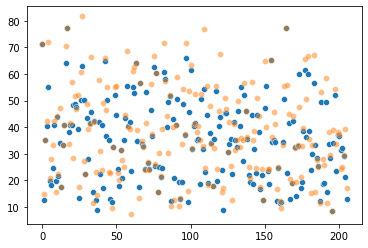

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.color_palette()

rangeX = np.array(list(range(len(y_pred))))
sns.scatterplot(x=rangeX, y=y_pred, palette='Greys')
sns.scatterplot(x=rangeX, y=y_test, palette='OrRd', alpha=0.5)
plt.show()

### 5.2.7 Time  <a name='5.2.7'></a>

- The complexity of the train part of the KNN algorithm is O(1). 
- The complexity of the test part of the KNN algorithm is O(n). 
- We can do our model training once and then test as many times as we want. The fact that the test part of the algorithm is longer than the train part creates a disadvantage. 


&emsp;&emsp;In our algorithm, the same process is applied for each k value until the last step. So there is no significant difference between the change in k value and time.

In [29]:
import time 

durationlist = list()
for k in [1,3,5,7,9]:
    start = time.time()
    model = KNNeighbors(n_neighbors=k, model_type="Regression", weights="uniform")
    scores = cross_val_score(model, X, y, k_split=5, stratify=False, scoring="MAE")   
    finish = time.time()
    duration = finish - start
    durationlist.append(duration)
    
time_compare = pd.DataFrame(durationlist,index=[1,3,5,7,9],columns=["duration"]).T
time_compare

,1,3,5,7,9
duration,0.131893,0.199569,0.195646,0.150951,0.183262


&emsp;&emsp;Generally cross validation splits the data by given fold and train the model using each fold as the test set. If we increase the number of folds, the time will also increase. Below we show 5 different values and time results.

In [30]:
durationlist = list()
for k in [5,10,103,len(X)]:
    start = time.time()
    model = KNNeighbors(n_neighbors=3, model_type="Regression", weights="uniform")
    scores = cross_val_score(model, X, y, k_split=k, stratify=False, scoring="MAE")   
    finish = time.time()
    duration = finish - start
    durationlist.append(duration)
    
time_compare = pd.DataFrame(durationlist,index=[5,10,103,len(X)],columns=["duration"]).T
time_compare

,5,10,103,1030
duration,0.298722,0.428985,0.54413,6.219938


### 5.2.8 Performance of different feature normalization  <a name='5.2.8'></a>

- We compared 4 different normalizing techniques and standard scaling techniques using weighted and weightless models. 
- l1 and l2 techniques are the techniques that give the best results. 
- It is important to normalize the data in the KNN algorithm because the features of our data are at different intervals and we calculate the distance between points in our algorithm. 

In [31]:
compare_norms_results(X, y, model_type='Regression', n_neighbors=3, weights='uniform', stratify=False, scoring='MAE').rename_axis('Technique').to_frame('MAE').T

Technique,Non-Normalized,MinMax,l1,l2,Max,StdScaler
MAE,6.389013,6.620243,5.555113,5.63021,5.900663,6.63021


In [32]:
compare_norms_results(X, y, model_type='Regression', n_neighbors=3, weights='distance', stratify=False, scoring='MAE').rename_axis('Technique').to_frame('MAE').T

Technique,Non-Normalized,MinMax,l1,l2,Max,StdScaler
MAE,5.507241,5.860239,4.955283,4.835608,5.139197,5.77463


## 6. Conclusion  <a name='6'></a>
What we learned with this assignment :
- We learned the basics of the KNN algorithm.
- We observed that the KNN algorithm has two different estimation techniques, weighted and weightles.
- We investigated the importance of the K value. 
- By testing the KNN algorithm on both regression and classification problems, we observed the differences and solutions to the problem. 
- We applied normalization and scaling techniques to our data, and observed the results. 
- We have determined the strategy we can follow while developing different machine learning models. 

## 7. References <a name='7'></a>

- Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron
- [towardsdatascience](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
- [Stanford CS229: Machine Learning](https://www.youtube.com/watch?v=jGwO_UgTS7I&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU)